In [1]:
%reset -f
%reload_ext autoreload
%autoreload 2
%matplotlib inline
%config Completer.use_jedi = False

In [2]:
import sys
sys.path.insert(0,"..")
from profiler import *
from utils import *
from datasets import *
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA


Available workers: 16


# Wingbeat sensor SD Card data

#### Freeflight

Found 2907 in dataset: Flytrap/herent, and 1 label(s): ['herent']
Label(s) changed to [1]


Creating a pandas Dataframe with file-paths, clean-scores, duration, sums of abs values, indice and labels..
Finished.


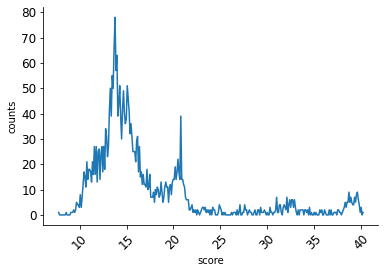

In [3]:
free = WingbeatDatasetProfiler(dsname='Flytrap/herent')
np_hist(free.df, 'score')

In [4]:
selection = 'score > 10 & score < 16 & max < 0.05 & duration > 10'
df_free = free.df.query(selection)
df_free.y = 0

/home/kalfasyan/anaconda3/envs/wbai/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [5]:
df_free.shape

(1017, 11)

100%|██████████| 20/20 [00:00<00:00, 30.29it/s]


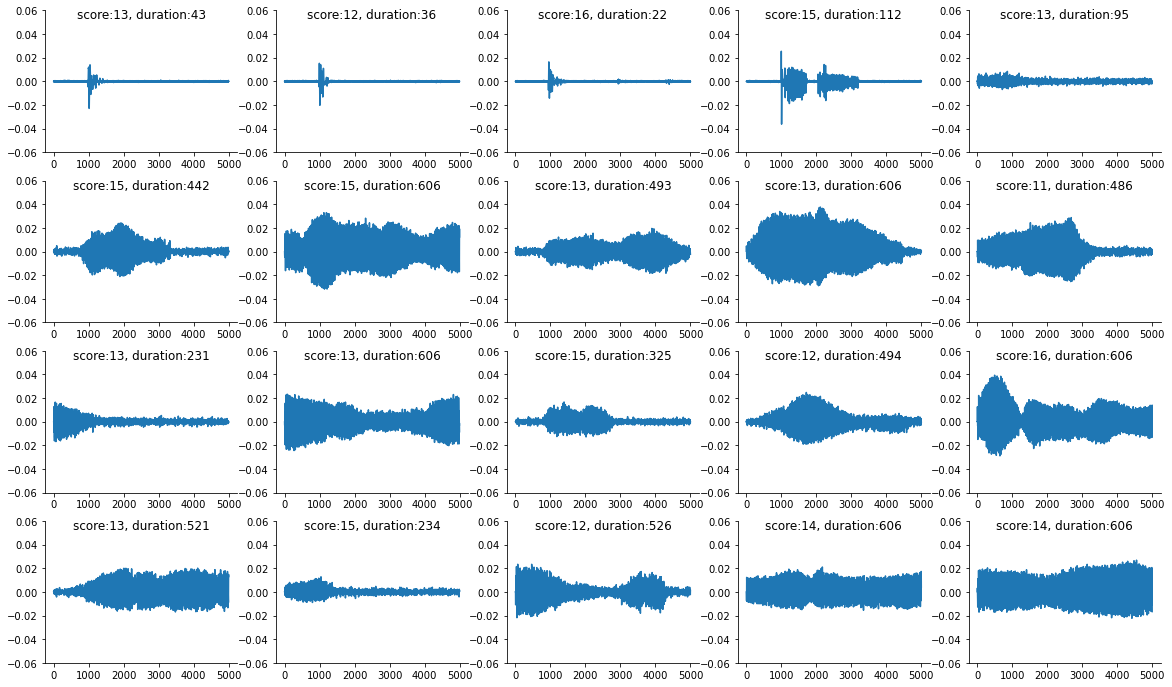

In [6]:
free.plot_random_wbts(df=df_free, noaxis=False)

In [7]:
dsfree = DataFrameset(df_free)

### Through flight

In [8]:
thru = WingbeatDatasetProfiler(dsname='Flytrap/pcfruit1')
np_hist(thru.df, 'score')

Found 38898 in dataset: Flytrap/pcfruit1, and 1 label(s): ['pcfruit1']
Label(s) changed to [1]


KeyboardInterrupt: 

In [ ]:
selection = 'score > 10 & score < 16 & max < 0.05 & duration > 10'
df_thru = thru.df.query(selection)#.sample(1500, replace=False)
df_thru.y = 1

In [ ]:
df_thru.shape

In [ ]:
dsthru = DataFrameset(df_thru)

# PCA Analysis

In [13]:
thruloader = DataLoader(dsthru, pin_memory=True, num_workers=4)
res = []
for x,y,p,idx in tqdm(thruloader):
    res.append(x)
th = torch.cat(res).squeeze()

100%|██████████| 6739/6739 [00:05<00:00, 1178.54it/s]


In [14]:
freeloader = DataLoader(dsfree, pin_memory=True, num_workers=4)
res = []
for x,y,p,idx in tqdm(freeloader):
    res.append(x)
fr = torch.cat(res).squeeze()

100%|██████████| 1017/1017 [00:00<00:00, 1086.13it/s]


In [15]:
fr = pd.DataFrame(fr.numpy())
fr['y'] = 'free'
th = pd.DataFrame(th.numpy())
th['y'] = 'through'

/home/kalfasyan/anaconda3/envs/wbai/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


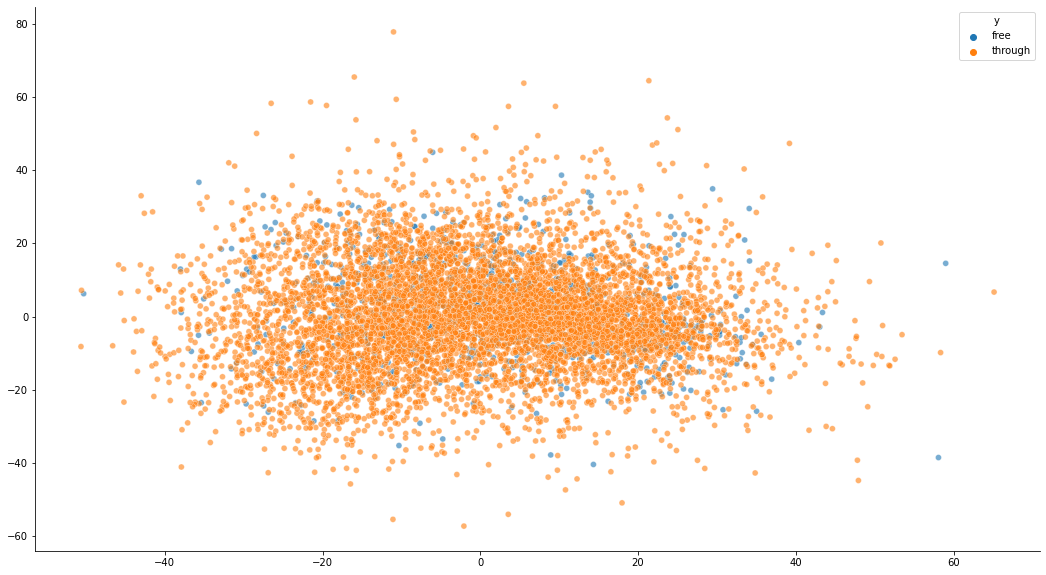

In [16]:
%matplotlib inline

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

df = pd.concat([fr,th])

X = df.iloc[:,:-1].values
X = sc.fit_transform(X)

pca = PCA(n_components=2)
X = pca.fit_transform(X)
plt.figure(figsize=(18,10))
sns.scatterplot(X[:,0], X[:,1], hue=df.y, alpha=.6);

In [17]:
df_free.y = 'free'
df_thru.y = 'through'

/home/kalfasyan/anaconda3/envs/wbai/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


66      22.5
77      22.5
92      22.5
93      22.5
147     25.2
        ... 
2793    25.2
2798    25.2
2801    25.2
2802    25.2
2806    25.2
Name: x, Length: 1017, dtype: float64

In [33]:
df_feats = pd.concat([df_free,df_thru])#.reset_index(drop=True).to_csv("/home/kalfasyan/Dropbox/to_send/free_vs_through_features.csv")
df_feats['humidity'] = df_feats.x.apply(lambda x: x.split('/')[-1].split('_')[-1][:-4]).astype(float)
df_feats['temperature'] = df_feats.x.apply(lambda x: x.split('/')[-1].split('_')[-3]).astype(float)

In [52]:
df_feats

,x,score,duration,sum,max,idx,y,fname,date,datestr,datehourstr,humidity,temperature
66,/home/kalfasyan/data/wingbeats/Flytrap/herent/D_21_01_30_18_57_54/F210130_214755_241_G_050_T_22.5_H_45.8.wav,13.075841,43.250,tensor(4.6308),tensor(0.0309),tensor(66),free,F210130_214755_241_G_050_T_22.5_H_45.8,2021-01-30 21:47:55,20210130,210130_21,45.8,22.5
77,/home/kalfasyan/data/wingbeats/Flytrap/herent/D_21_01_30_18_57_54/F210130_214934_242_G_050_T_22.5_H_46.2.wav,12.468421,35.875,tensor(4.1803),tensor(0.0278),tensor(77),free,F210130_214934_242_G_050_T_22.5_H_46.2,2021-01-30 21:49:34,20210130,210130_21,46.2,22.5
92,/home/kalfasyan/data/wingbeats/Flytrap/herent/D_21_01_30_18_57_54/F210130_215206_244_G_050_T_22.5_H_46.2.wav,15.510168,22.250,tensor(3.6556),tensor(0.0216),tensor(92),free,F210130_215206_244_G_050_T_22.5_H_46.2,2021-01-30 21:52:06,20210130,210130_21,46.2,22.5
93,/home/kalfasyan/data/wingbeats/Flytrap/herent/D_21_01_30_18_57_54/F210130_215035_243_G_050_T_22.5_H_46.2.wav,15.024141,112.125,tensor(7.3943),tensor(0.0406),tensor(93),free,F210130_215035_243_G_050_T_22.5_H_46.2,2021-01-30 21:50:35,20210130,210130_21,46.2,22.5
147,/home/kalfasyan/data/wingbeats/Flytrap/herent/D_21_04_28_10_03_38/F210428_101341_111_G_050_T_25.2_H_63.8.wav,13.324954,94.625,tensor(10.9191),tensor(0.0171),tensor(147),free,F210428_101341_111_G_050_T_25.2_H_63.8,2021-04-28 10:13:41,20210428,210428_10,63.8,25.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38889,/home/kalfasyan/data/wingbeats/Flytrap/pcfruit1/D_21_04_11_23_52_47/F210412_042936_010_G_050_T_34.1_H_25.2.wav,11.060431,452.125,tensor(24.4486),tensor(0.0400),tensor(38889),through,F210412_042936_010_G_050_T_34.1_H_25.2,2021-04-12 04:29:36,20210412,210412_04,25.2,34.1
38891,/home/kalfasyan/data/wingbeats/Flytrap/pcfruit1/D_21_04_11_23_52_47/F210412_041349_249_G_050_T_34.1_H_25.2.wav,11.622401,507.000,tensor(31.8712),tensor(0.0269),tensor(38891),through,F210412_041349_249_G_050_T_34.1_H_25.2,2021-04-12 04:13:49,20210412,210412_04,25.2,34.1
38894,/home/kalfasyan/data/wingbeats/Flytrap/pcfruit1/D_21_04_11_23_52_47/F210412_000019_222_G_050_T_34.1_H_23.3.wav,12.191616,527.000,tensor(37.4486),tensor(0.0429),tensor(38894),through,F210412_000019_222_G_050_T_34.1_H_23.3,2021-04-12 00:00:19,20210412,210412_00,23.3,34.1
38895,/home/kalfasyan/data/wingbeats/Flytrap/pcfruit1/D_21_04_11_23_52_47/F210412_010926_228_G_050_T_34.1_H_23.8.wav,15.427745,559.875,tensor(35.8501),tensor(0.0352),tensor(38895),through,F210412_010926_228_G_050_T_34.1_H_23.8,2021-04-12 01:09:26,20210412,210412_01,23.8,34.1


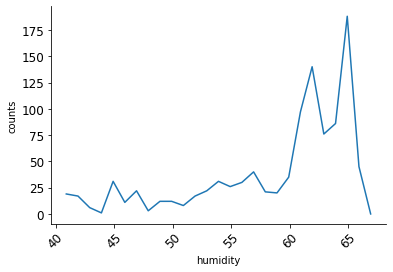

In [49]:
np_hist(df_feats[df_feats.y=='free'], 'humidity', res=1)

In [50]:
df_feats.reset_index(drop=True).to_csv("/home/kalfasyan/Dropbox/to_send/free_vs_through_features.csv")

In [185]:
df.to_csv("/home/kalfasyan/Dropbox/to_send/free_vs_through.csv")

In [184]:
df.y.value_counts()

through    6739
free       1017
Name: y, dtype: int64

In [51]:
df

,0,1,2,3,4,5,6,7,8,9,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,y
0,-0.001068,0.000580,0.000244,-0.000275,0.000336,-0.000763,0.000580,0.000732,-0.000397,0.000671,...,0.000519,-0.000153,-0.000336,0.000183,-0.000244,0.000427,-0.000519,-0.000397,-0.000122,free
1,-0.000488,-0.000549,-0.000519,0.000610,-0.000153,-0.000458,0.000641,-0.000854,0.000000,-0.000061,...,-0.000977,-0.000305,0.000000,-0.000702,-0.000427,-0.000244,-0.000244,-0.000336,-0.000122,free
2,0.000397,-0.000336,-0.000702,0.000000,-0.000366,-0.000732,-0.000641,-0.000092,0.000763,-0.000305,...,0.001587,0.001434,0.000519,0.000458,0.001007,-0.000092,0.000336,0.001221,-0.000244,free
3,-0.000122,-0.000610,-0.000275,-0.000061,-0.000946,-0.000153,-0.000366,-0.000183,0.000610,-0.000061,...,0.000305,0.001190,0.000519,-0.000763,0.000275,0.000854,-0.000122,0.000214,0.000427,free
4,0.000031,0.001617,0.000824,0.001953,-0.001434,-0.001465,-0.003998,0.000977,-0.001831,0.003204,...,0.001465,0.000122,0.001770,0.004211,-0.000061,-0.000854,0.000214,0.002289,0.002747,free
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6734,0.016327,0.018341,0.018890,0.018097,0.019562,0.020050,0.017059,0.013275,0.008698,0.006042,...,0.004852,0.001678,0.001984,0.002136,0.000183,-0.002930,-0.004089,-0.002258,-0.002777,through
6735,0.006287,0.004608,0.008423,0.011597,0.012421,0.014191,0.018494,0.017395,0.019806,0.022522,...,-0.004486,-0.004364,-0.002075,-0.001434,-0.001923,0.000061,-0.002136,-0.000732,-0.001984,through
6736,0.001099,0.002869,0.003357,0.003143,0.005096,0.003662,0.002716,0.002533,0.005493,0.004822,...,0.003815,0.004578,0.001434,0.000916,0.001892,-0.000214,0.001251,0.000793,0.002655,through
6737,0.020325,0.017059,0.015869,0.017761,0.016998,0.016052,0.016815,0.015320,0.012238,0.011719,...,0.004547,-0.001434,-0.001892,0.000732,0.002655,0.000549,0.002747,0.003723,0.001740,through
